# TP4 Ciencia de Datos- Giacobelli & Strejilevich, Franciscos



### Cargamos la base de datos

In [235]:
import pandas as pd

from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Ejercicio 2

In [236]:
ind_24 = pd.read_excel(r"C:\Users\fstrejilevich\Desktop\TP4\usu_individual_T124.xlsx")
ind_04 = pd.read_stata(r"C:\Users\fstrejilevich\Desktop\TP4\Individual_t104.dta")
hogar_24 = pd.read_excel(r"C:\Users\fstrejilevich\Desktop\TP4\usu_hogar_T124.xlsx")
hogar_04 = pd.read_stata(r"C:\Users\fstrejilevich\Desktop\TP4\Hogar_t104.dta")

### Revisamos las columnas: 

In [237]:
#Miro las columnas que tenemos
hogar_04.columns

Index(['CODUSU', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region',
       'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3',
       'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10',
       'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1',
       'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7',
       'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3',
       'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14',
       'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'IX_Tot', 'IX_Men10',
       'IX_Mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr',
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3',
       'vii2_4', 'idimph'],
      dtype='object')

In [238]:
hogar_24.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

In [239]:
#Pasamos todas las columnas a mayusculas para que queden iguales despues en el merge
# Cambiamos los nombres de las columnas a mayúsculas
hogar_04.columns = hogar_04.columns.str.upper()
hogar_24.columns = hogar_24.columns.str.upper()
ind_04.columns = ind_04.columns.str.upper()
ind_24.columns = ind_24.columns.str.upper()

### Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base.

###### Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.

In [240]:
# Armo un diccionario de mapeo para estandarizar los nombres
aglomerado_04 = {'Ciudad de Buenos Aires': 'CABA', 'Partidos del GBA': 'GBA'}
aglomerado_24 = {32: 'CABA', 33: 'GBA'}

# Ahora a filtramos y transformamos los datos individuales
ind_04_filtrado = ind_04.query("AGLOMERADO in @aglomerado_04.keys()").copy()
ind_04_filtrado['AGLOMERADO'] = ind_04_filtrado['AGLOMERADO'].map(aglomerado_04)

ind_24_filtrado = ind_24.query("AGLOMERADO in @aglomerado_24.keys()").copy()
ind_24_filtrado['AGLOMERADO'] = ind_24_filtrado['AGLOMERADO'].map(aglomerado_24)

# Lo mismo peor con los datos de hogares
hogar_04_filtrado = hogar_04.query("AGLOMERADO in @aglomerado_04.keys()").copy()
hogar_04_filtrado['AGLOMERADO'] = hogar_04_filtrado['AGLOMERADO'].map(aglomerado_04)

hogar_24_filtrado = hogar_24.query("AGLOMERADO in @aglomerado_24.keys()").copy()
hogar_24_filtrado['AGLOMERADO'] = hogar_24_filtrado['AGLOMERADO'].map(aglomerado_24)

# Post filtrados verificamos las dimensiones de cada uno que limpiamos
for df_name, df in zip(
    ["ind_04_filtrado", "ind_24_filtrado", "hogar_04_filtrado", "hogar_24_filtrado"],
    [ind_04_filtrado, ind_24_filtrado, hogar_04_filtrado, hogar_24_filtrado]
): 
    print(f"Datos en {df_name}: {df.shape}")
print(hogar_04_filtrado['AGLOMERADO'].value_counts())
print(ind_04_filtrado['AGLOMERADO'].value_counts())
print(hogar_24_filtrado['AGLOMERADO'].value_counts())
print(ind_24_filtrado['AGLOMERADO'].value_counts())

Datos en ind_04_filtrado: (7647, 176)
Datos en ind_24_filtrado: (7051, 177)
Datos en hogar_04_filtrado: (2351, 88)
Datos en hogar_24_filtrado: (2545, 88)
AGLOMERADO
GBA     1663
CABA     688
Name: count, dtype: int64
AGLOMERADO
GBA     5811
CABA    1836
Name: count, dtype: int64
AGLOMERADO
GBA     1881
CABA     664
Name: count, dtype: int64
AGLOMERADO
GBA     5629
CABA    1422
Name: count, dtype: int64


In [241]:

print(ind_04_filtrado['CODUSU'].value_counts)

<bound method IndexOpsMixin.value_counts of 0       125098  
1       125397  
2       125515  
3       125558  
4       125558  
          ...   
7642    288171  
7643    288405  
7644    288405  
7645    288405  
7646    288405  
Name: CODUSU, Length: 7647, dtype: object>


In [242]:
# Listas de nombres y DataFrames a procesar
datasets = {
    "ind_04_filtrado": ind_04_filtrado,
    "ind_24_filtrado": ind_24_filtrado,
    "hogar_04_filtrado": hogar_04_filtrado,
    "hogar_24_filtrado": hogar_24_filtrado
}

# Ajustamos el formato de las claves CODUSU y NRO_HOGAR
datasets = {name: df.assign(
    CODUSU=df['CODUSU'].astype(str),  # Convertimos CODUSU a string
    NRO_HOGAR=df['NRO_HOGAR'].astype(int)  # Convertimos NRO_HOGAR a entero
) for name, df in datasets.items()}

# Verificar valores nulos y mostrar resultados
for name, df in datasets.items():
    print(f"Valores nulos en {name}:")
    print(df[['CODUSU', 'NRO_HOGAR']].isnull().sum())


Valores nulos en ind_04_filtrado:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en ind_24_filtrado:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en hogar_04_filtrado:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en hogar_24_filtrado:
CODUSU       0
NRO_HOGAR    0
dtype: int64


In [243]:
data_2004 = ind_04_filtrado.merge(hogar_04_filtrado, on=['CODUSU', 'NRO_HOGAR'], how='inner')
print(data_2004['CODUSU'].value_counts())

CODUSU
219747      15
157368      14
134291      13
204642      13
136127      12
            ..
218565       1
207544       1
207177       1
207130       1
125098       1
Name: count, Length: 2329, dtype: int64


Fran, acá arriba lo que hice fue asegurarme de que las columnas claves CODUSU y NRO_HOGAR estén en el formato correcto antes de seguir codeando. Convertí CODUSU a texto, porque es un identificador único, y pasé NRO_HOGAR a números enteros porque tiene más sentido usarlo como número para cálculos o filtros. Para organizarme mejor, puse todos los DataFrames (como ind_04_filtrado y hogar_04_filtrado) en un diccionario que me permite recorrerlos de manera más facil y mantener el código limpio.

Hice esto porque quiero evitar errores al unir las bases más adelante. Además, usé el método assign para ajustar las columnas de cada DataFrame en una sola línea, además verifiqué si había valores nulos en estas claves (isnull().sum()), porque si aparecen, pueden complicar los merges creo yo, si pasa eso habría que decidir cómo manejarlos. Si queres cambiar algo obvio anda manejandolo

### Merge de las bases de datos

In [244]:
#debido a que el codigo de la parte 1 se hizo considerando a las bases como una, se va a repetir codigo para la limpieza, los datasets data_2004 y data_2024 serán usados para los modelos estadisticos
# Merge para 2004, la columna "ano" separando las variables de 2024 y 2004 respectivamente, posteriormente va a ayudar a separar que variables no se usan en la regresion
data_2004 = ind_04_filtrado.merge(hogar_04_filtrado, on=['CODUSU', 'NRO_HOGAR'], how='inner')
data_2004['ano']=2004
print("Datos combinados para 2004:", data_2004.shape)
# Merge para 2024
data_2024 = ind_24_filtrado.merge(hogar_24_filtrado, on=['CODUSU', 'NRO_HOGAR'], how='inner')
data_2024['ano']=2024
print("Datos combinados para 2004:", data_2024.shape)
# Combina los datos en un único DataFrame
merge_data = pd.concat([data_2004, data_2024], ignore_index=True)

# Verifica dimensiones y columnas
print("Dimensiones de merge_data:", merge_data.shape)
print("Columnas de merge_data:", merge_data.columns)
print(merge_data['ano'])


Datos combinados para 2004: (7647, 263)
Datos combinados para 2004: (7051, 264)
Dimensiones de merge_data: (14698, 269)
Columnas de merge_data: Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4_x', 'TRIMESTRE_x',
       'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x',
       ...
       'VII2_3', 'VII2_4', 'IDIMPH', 'ano', 'CH05', 'IMPUTA', 'PONDIIO',
       'PONDII', 'PONDIH_x', 'PONDIH_y'],
      dtype='object', length=269)
0        2004
1        2004
2        2004
3        2004
4        2004
         ... 
14693    2024
14694    2024
14695    2024
14696    2024
14697    2024
Name: ano, Length: 14698, dtype: int64


In [245]:
print(data_2004['CODUSU'].value_counts())

CODUSU
219747      15
157368      14
134291      13
204642      13
136127      12
            ..
218565       1
207544       1
207177       1
207130       1
125098       1
Name: count, Length: 2329, dtype: int64


In [246]:
print(data_2024['CODUSU'].value_counts())

CODUSU
TQRMNORYYHLNMQCDEIJAH00855538    12
TQRMNOQUSHJOPQCDEIJAH00793462    12
TQRMNOTPSHJNSOCDEIJAH00794201    11
TQRMNOQTVHLMMMCDEIJAH00855297    11
TQRMNOQPRHJOONCDEIJAH00860538    10
                                 ..
TQRMNOQSRHLNONCDEIIAD00854777     1
TQRMNOQXXHMMQLCDEIJAH00802449     1
TQRMNOSSYHKMQNCDEIJAH00859642     1
TQRMNOSRTHJMSLCDEIJAH00797047     1
TQRMNORXWHKKNQCDEIIAD00858564     1
Name: count, Length: 2540, dtype: int64


In [247]:


# Mostrar el DataFrame o sus columnas
print(data_2024.columns)

Index(['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x',
       ...
       'PDECCFR_y', 'ADECCFR_y', 'PONDIH_y', 'VII1_1', 'VII1_2', 'VII2_1',
       'VII2_2', 'VII2_3', 'VII2_4', 'ano'],
      dtype='object', length=264)


In [248]:
data_2004['ESTADO'].value_counts()

ESTADO
Ocupado                                                         3079
Inactivo                                                        2800
Menor de 10 años                                                1230
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Name: count, dtype: int64

### Punto 3- Limpieza de datos

In [249]:
# Inspecciono las columnas y su contenido
print("\nColumnas de merge_data:")
print(merge_data.columns.tolist())

print("\nPrimeras filas de merge_data:")
print(merge_data.head())


Columnas de merge_data:
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4_x', 'TRIMESTRE_x', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP0

In [250]:
# Inspecciono las columnas y su contenido
print("\nColumnas de merge_data:")
print(data_2004.columns.tolist())




Columnas de merge_data:
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4_x', 'TRIMESTRE_x', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP0

In [251]:
# Inspecciono las columnas y su contenido
print("\nColumnas de merge_data:")
print(data_2024.columns.tolist())



Columnas de merge_data:
['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D

In [252]:
# Columnas a eliminar
columnas_eliminar = [
    # categorías de ingreso derivadas
    "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR",
    # variables de hogar poco relevantes
    "VII1_1", "VII1_2", "VII2_1", "VII2_2", "VII2_3", "VII2_4",
    # variables de ubicación (ya están en aglomerados)
    "REGION", "MAS_500",
    # ponderaciones (si no usamos pesos)
    "PONDERA", "PONDIH"
]

# Limpiar columnas
cols_existentes = [col for col in columnas_eliminar if col in merge_data.columns]
merge_data = merge_data.drop(columns=cols_existentes)
cols_existentes = [col for col in columnas_eliminar if col in data_2004.columns]
data_2004= data_2004.drop(columns=cols_existentes)
cols_existentes = [col for col in columnas_eliminar if col in data_2024.columns]
data_2024= data_2024.drop(columns=cols_existentes)


print(f"Columnas eliminadas: {cols_existentes}")

# Verificar dimensiones después de eliminar columnas
print("\nDimensiones después de eliminar columnas:", merge_data.shape)


Columnas eliminadas: ['VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4']

Dimensiones después de eliminar columnas: (14698, 263)


In [253]:
data_2004['ESTADO'].value_counts()

ESTADO
Ocupado                                                         3079
Inactivo                                                        2800
Menor de 10 años                                                1230
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Name: count, dtype: int64

In [254]:
data_2024['ESTADO'].value_counts()

ESTADO
1    3224
3    2662
4     813
2     311
0      41
Name: count, dtype: int64

In [255]:
# Tratamiento de valores NaN y datos inválidos
print("\nProcesando valores NaN y datos inválidos...")

# Columnas clave para tratamiento
columnas_clave = ['CODUSU', 'NRO_HOGAR', 'CH06', 'IX_TOT', 'IPCF', 'NIVEL_ED']
columnas_clave_existentes = [col for col in columnas_clave if col in merge_data.columns]

# Eliminar filas con NaN en columnas clave
merge_data.dropna(subset=columnas_clave_existentes, inplace=True)

columnas_clave_validas = [col for col in columnas_clave_existentes if col in data_2004.columns]
data_2004.dropna(subset=columnas_clave_validas, inplace=True)

columnas_clave_validas = [col for col in columnas_clave_existentes if col in data_2024.columns]
data_2024.dropna(subset=columnas_clave_validas, inplace=True)

# Reemplazar valores inválidos como 9, 99, 999, 9999 con NaN
merge_data.replace([9, 99, 999, 9999], np.nan, inplace=True)
data_2004.replace([9, 99, 999, 9999], np.nan, inplace=True)
data_2024.replace([9, 99, 999, 9999], np.nan, inplace=True)
# Eliminar filas con NaN en columnas críticas
columnas_criticas = ['CH06', 'IX_TOT', 'IPCF']
columnas_criticas_existentes = [col for col in columnas_criticas if col in merge_data.columns]
merge_data.dropna(subset=columnas_criticas_existentes, inplace=True)
data_2004.dropna(subset=columnas_criticas_existentes, inplace=True)
data_2024.dropna(subset=columnas_criticas_existentes, inplace=True)

# Rellenar valores NaN en columnas categóricas con 'Desconocido'
cat_cols = merge_data.select_dtypes(include=['object']).columns
cat_cols_2004_valid = [col for col in cat_cols if col in data_2004.columns]
cat_cols_2024_valid = [col for col in cat_cols if col in data_2024.columns]
cat_cols_2004_valid = data_2004.select_dtypes(include=['object']).columns
cat_cols_2024_valid = data_2024.select_dtypes(include=['object']).columns
merge_data[cat_cols] = merge_data[cat_cols].fillna('Desconocido')
data_2004[cat_cols_2004_valid] = data_2004[cat_cols_2004_valid].fillna('Desconocido')
data_2024[cat_cols_2024_valid] = data_2024[cat_cols_2024_valid].fillna('Desconocido')



# Verificar dimensiones finales y resumen de NaN
print("\nDimensiones finales de merge_data:", merge_data.shape)
print("\nValores NaN restantes por columna:")
print(merge_data.isnull().sum())


Procesando valores NaN y datos inválidos...

Dimensiones finales de merge_data: (14243, 263)

Valores NaN restantes por columna:
CODUSU            0
NRO_HOGAR         0
COMPONENTE        0
H15               0
ANO4_x            0
              ...  
IMPUTA        14168
PONDIIO        7377
PONDII         7378
PONDIH_x       7377
PONDIH_y       7377
Length: 263, dtype: int64


In [256]:
data_2004['ESTADO'].value_counts()

ESTADO
Ocupado                                                         3031
Inactivo                                                        2741
Menor de 10 años                                                1084
Desocupado                                                       512
Entrevista individual no realizada (no respuesta al cuestion       9
Name: count, dtype: int64

In [257]:
data_2024['ESTADO'].value_counts()

ESTADO
1    3201
3    2627
4     687
2     310
0      41
Name: count, dtype: int64

##### Basicamente limpie datos con lo que dijo nacho y algunos otros criterios, en principio elimine columnas que toman respuestas de lo que respondieron en otra variable, como las categorías de ingreso (DECCFR, IDECCFR, etc.) que derivan del ingreso per cápita (IPCF). También saqué variables redundantes de ubicación como REGION y MAS_500, ya que AGLOMERADO ya las engloba. Además, descarté detalles menos útiles del hogar (VII1_1, VII2_1, etc.) que no aportan valor directo al análisis, y ponderaciones como PONDERA que no vamos a usar ahora. En resumen, me enfoqué en quedarme solo con las columnas que son relevantes para las siguientes etapas del análisis."

# Punto 4- Formar 3 variables que me puedan predecir la desocupación

### Variable 1- Edad promedio hogar

In [258]:
# Aseguramos que la columna CH06 sea numérica
merge_data['CH06'] = pd.to_numeric(merge_data['CH06'], errors='coerce')
data_2004['CH06'] = pd.to_numeric(data_2004['CH06'], errors='coerce')
data_2024['CH06'] = pd.to_numeric(data_2024['CH06'], errors='coerce')
# Edad promedio por hogar (EDAD_PROMEDIO_HOGAR)
merge_data['EDAD_PROMEDIO_HOGAR'] = merge_data.groupby(['CODUSU', 'NRO_HOGAR'])['CH06'].transform('mean')
data_2004['EDAD_PROMEDIO_HOGAR'] = data_2004.groupby(['CODUSU', 'NRO_HOGAR'])['CH06'].transform('mean')
data_2024['EDAD_PROMEDIO_HOGAR'] = data_2024.groupby(['CODUSU', 'NRO_HOGAR'])['CH06'].transform('mean')


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\1206945774.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merge_data['EDAD_PROMEDIO_HOGAR'] = merge_data.groupby(['CODUSU', 'NRO_HOGAR'])['CH06'].transform('mean')


### Variable 2- Mapeo el nivel educativo y lo convierto a numeros

In [259]:
#Crear la variable 'NIVEL_EDUCATIVO': Convertir a valores numéricos para el nivel educativo
niveles_educativos = {
    'Sin instrucción': 0,
    'Primaria Incompleta': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Ns./Nr.': None  # Manejar como NaN
}
merge_data['NIVEL_ED_NUM'] = merge_data['NIVEL_ED'].replace(niveles_educativos)
data_2004['NIVEL_ED_NUM'] = data_2004['NIVEL_ED'].replace(niveles_educativos)
data_2024['NIVEL_ED_NUM'] = data_2024['NIVEL_ED'].replace(niveles_educativos)


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\4123729238.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merge_data['NIVEL_ED_NUM'] = merge_data['NIVEL_ED'].replace(niveles_educativos)


### Variable 3- Proporcion de personas con educación superior por hogar 

###### Se relaciona con la anterior, pueden pensarse como una, pero sirven para analisis diferentes

In [260]:
#Ademas me parece interesante que hagamos proporcion de personas con Educacion superior, ya que tener a alguien con educ supuerior puede influenciar mucho a su hogar
#Convierto a numerico pq me daba error
merge_data['NIVEL_ED_NUM'] = pd.to_numeric(merge_data['NIVEL_ED_NUM'], errors='coerce')
data_2004['NIVEL_ED_NUM'] = pd.to_numeric(data_2004['NIVEL_ED_NUM'], errors='coerce')
data_2024['NIVEL_ED_NUM'] = pd.to_numeric(data_2024['NIVEL_ED_NUM'], errors='coerce')

merge_data['PROP_EDUC_SUPERIOR'] = merge_data.groupby(['CODUSU', 'NRO_HOGAR'])['NIVEL_ED_NUM'].transform(lambda x: (x >= 5).sum()) / merge_data.groupby(['CODUSU', 'NRO_HOGAR'])['NRO_HOGAR'].transform('count')
data_2004['PROP_EDUC_SUPERIOR'] = data_2004.groupby(['CODUSU', 'NRO_HOGAR'])['NIVEL_ED_NUM'].transform(lambda x: (x >= 5).sum()) / data_2004.groupby(['CODUSU', 'NRO_HOGAR'])['NRO_HOGAR'].transform('count')
data_2024['PROP_EDUC_SUPERIOR'] = data_2024.groupby(['CODUSU', 'NRO_HOGAR'])['NIVEL_ED_NUM'].transform(lambda x: (x >= 5).sum()) / data_2024.groupby(['CODUSU', 'NRO_HOGAR'])['NRO_HOGAR'].transform('count')


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\3116172694.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merge_data['PROP_EDUC_SUPERIOR'] = merge_data.groupby(['CODUSU', 'NRO_HOGAR'])['NIVEL_ED_NUM'].transform(lambda x: (x >= 5).sum()) / merge_data.groupby(['CODUSU', 'NRO_HOGAR'])['NRO_HOGAR'].transform('count')


### Variable 4- Estado civil como numerica

In [261]:
# Convierto estado civil en números
estado_civil = {
    'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5
}
merge_data['ESTADO_CIVIL_NUM'] = merge_data['CH07'].replace(estado_civil)
data_2004['ESTADO_CIVIL_NUM'] = data_2004['CH07'].replace(estado_civil)
data_2024['ESTADO_CIVIL_NUM'] = data_2024['CH07'].replace(estado_civil)

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\3177539982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merge_data['ESTADO_CIVIL_NUM'] = merge_data['CH07'].replace(estado_civil)


### Variable 5- Tiene pareja (Casado o Unido)

###### Pasa algo similar al anteiror pueden pensarse como una, pero pasarla a numerica permite ver muchos analisis en el punto 5

In [262]:
#separo casado y unido para separar los que estan en pareja
merge_data['TIENE_PAREJA'] = merge_data['CH07'].apply(lambda x: 1 if x in ['Unido', 'Casado'] else 0)
data_2004['TIENE_PAREJA'] = data_2004['CH07'].apply(lambda x: 1 if x in ['Unido', 'Casado'] else 0)
data_2024['TIENE_PAREJA'] = data_2024['CH07'].apply(lambda x: 1 if x in ['Unido', 'Casado'] else 0)

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\4198414838.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merge_data['TIENE_PAREJA'] = merge_data['CH07'].apply(lambda x: 1 if x in ['Unido', 'Casado'] else 0)


### Veo como van quedando las columnas

In [263]:
print("\nNuevas variables creadas:")
print(merge_data[['CODUSU', 'NRO_HOGAR', 'EDAD_PROMEDIO_HOGAR', 'NIVEL_ED_NUM', "PROP_EDUC_SUPERIOR",'ESTADO_CIVIL_NUM','TIENE_PAREJA']].head())


Nuevas variables creadas:
     CODUSU  NRO_HOGAR  EDAD_PROMEDIO_HOGAR  NIVEL_ED_NUM  PROP_EDUC_SUPERIOR  \
0  125098          1.0                 79.0           3.0                0.00   
1  125397          1.0                 67.0           2.0                0.00   
2  125515          1.0                 74.0           2.0                0.00   
3  125558          1.0                 37.5           2.0                0.75   
4  125558          1.0                 37.5           6.0                0.75   

  ESTADO_CIVIL_NUM  TIENE_PAREJA  
0                4             0  
1                3             0  
2                4             0  
3                2             1  
4                2             1  


# Punto 5- Estadísticas descriptivas de tres variables

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

#Descripcion de las variables que calculé antes
variables_a_describir = ['EDAD_PROMEDIO_HOGAR', 'PROP_EDUC_SUPERIOR', 'ESTADO_CIVIL_NUM', 'TIENE_PAREJA']
print("Estadísticas descriptivas de las variables:")
print(merge_data[variables_a_describir].describe())

Estadísticas descriptivas de las variables:
       EDAD_PROMEDIO_HOGAR  PROP_EDUC_SUPERIOR  TIENE_PAREJA
count         14243.000000        14243.000000  14243.000000
mean             36.497463            0.262515      0.221372
std              17.267704            0.327469      0.415185
min               9.000000            0.000000      0.000000
25%              23.666667            0.000000      0.000000
50%              31.500000            0.142857      0.000000
75%              45.333333            0.500000      0.000000
max              97.000000            1.000000      1.000000


### Distribución de ESTADO_CIVIL

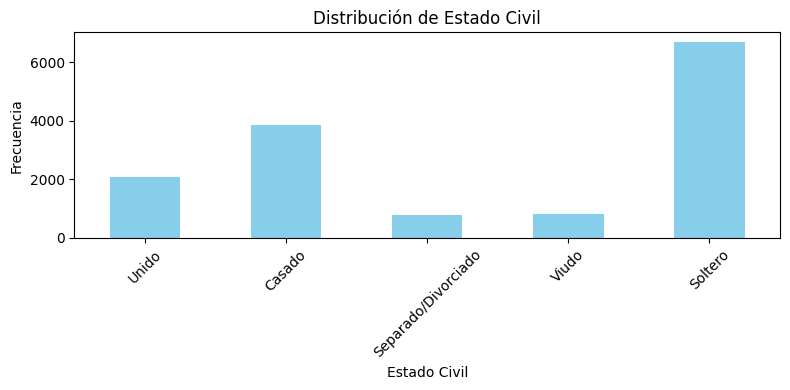

In [265]:
# Aseguramos que la columna sea numérica
merge_data['ESTADO_CIVIL_NUM'] = pd.to_numeric(merge_data['ESTADO_CIVIL_NUM'], errors='coerce')

# Calculamos frecuencias y las ordenamos
estado_civil_frecuencia = merge_data['ESTADO_CIVIL_NUM'].value_counts().sort_index()

# Etiquetas para los niveles
estado_civil_labels = ['Unido', 'Casado', 'Separado/Divorciado', 'Viudo', 'Soltero']

# Gráfico
plt.figure(figsize=(8, 4))
estado_civil_frecuencia.plot(kind='bar', color='skyblue')
plt.title('Distribución de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(estado_civil_labels)), labels=estado_civil_labels, rotation=45)
plt.tight_layout()
plt.show()


### Proporción de personas en pareja

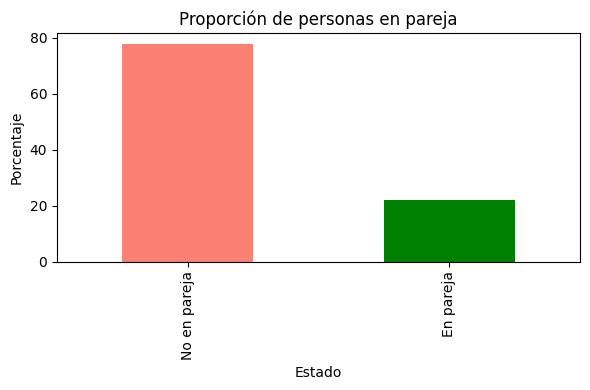

In [266]:
pareja_frecuencia = merge_data['TIENE_PAREJA'].value_counts(normalize=True) * 100
pareja_frecuencia.index = ['No en pareja', 'En pareja']

plt.figure(figsize=(6, 4))
pareja_frecuencia.plot(kind='bar', color=['salmon', 'green'])
plt.title('Proporción de personas en pareja')
plt.ylabel('Porcentaje')
plt.xlabel('Estado')
plt.tight_layout()
plt.show()

### Relación entre TIENE_PAREJA y EDAD_PROMEDIO_HOGAR 

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\3180429608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merge_data, x='TIENE_PAREJA', y='EDAD_PROMEDIO_HOGAR', palette='pastel')


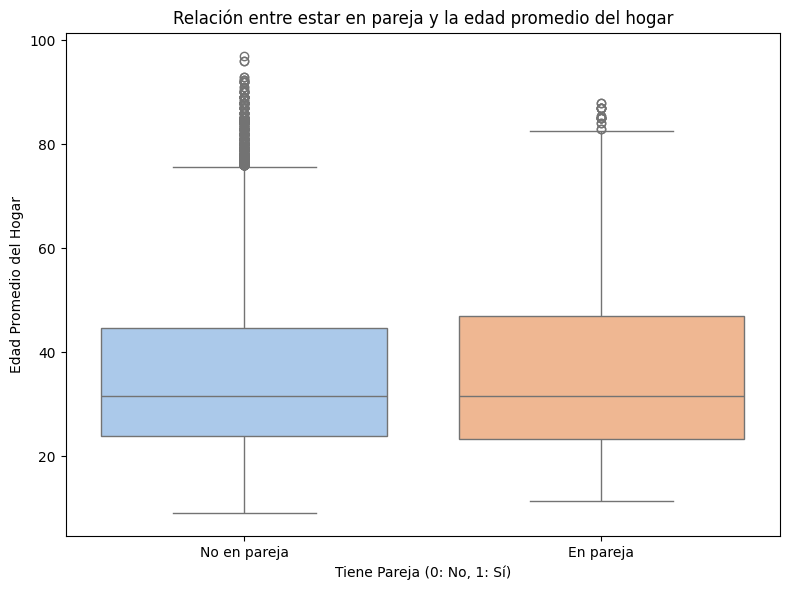

In [267]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merge_data, x='TIENE_PAREJA', y='EDAD_PROMEDIO_HOGAR', palette='pastel')
plt.title('Relación entre estar en pareja y la edad promedio del hogar')
plt.ylabel('Edad Promedio del Hogar')
plt.xlabel('Tiene Pareja (0: No, 1: Sí)')
plt.xticks([0, 1], ['No en pareja', 'En pareja'])
plt.tight_layout()
plt.show()

### Distribucion de estado civil en nivel de educación superior

C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\2923515605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ESTADO_CIVIL_NUM'] = filtered_data['ESTADO_CIVIL_NUM'].astype(int)
C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\2923515605.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\2923515605.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


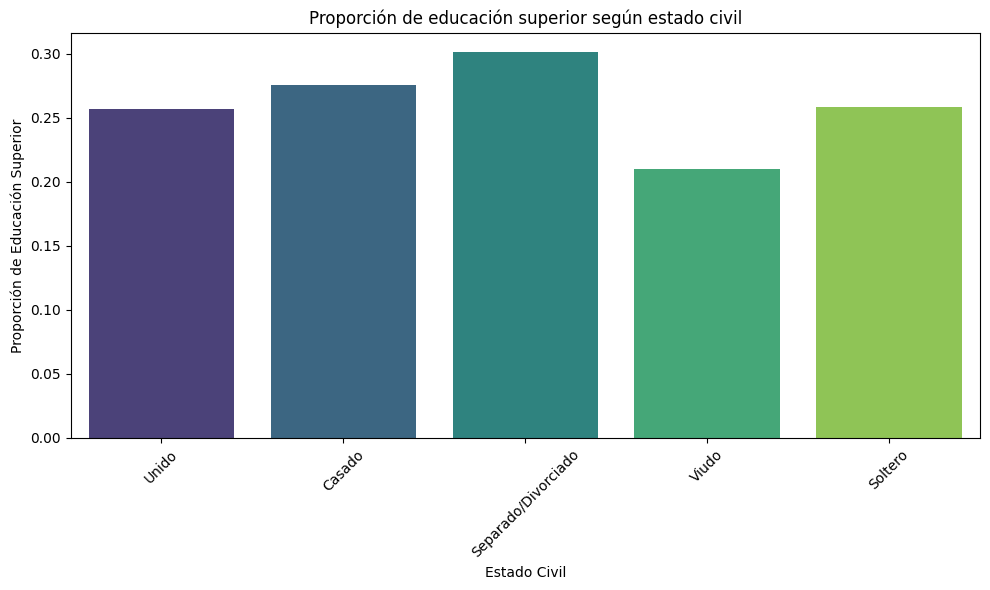

In [268]:
# armo etiquetas y las transformo
estado_civil_labels = ['Unido', 'Casado', 'Separado/Divorciado', 'Viudo', 'Soltero']
filtered_data = merge_data.dropna(subset=['PROP_EDUC_SUPERIOR', 'ESTADO_CIVIL_NUM'])
filtered_data['ESTADO_CIVIL_NUM'] = filtered_data['ESTADO_CIVIL_NUM'].astype(int)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_data,
    x='ESTADO_CIVIL_NUM',
    y='PROP_EDUC_SUPERIOR',
    palette='viridis',
    ci=None,  # Saco intervalo de confianza
    order=[1, 2, 3, 4, 5]  # Orden numérico de estados civiles
)

plt.title('Proporción de educación superior según estado civil')
plt.ylabel('Proporción de Educación Superior')
plt.xlabel('Estado Civil')
plt.xticks(ticks=range(5), labels=estado_civil_labels, rotation=45)
plt.tight_layout()
plt.show()


### Histograma de distribución de niveles de educación

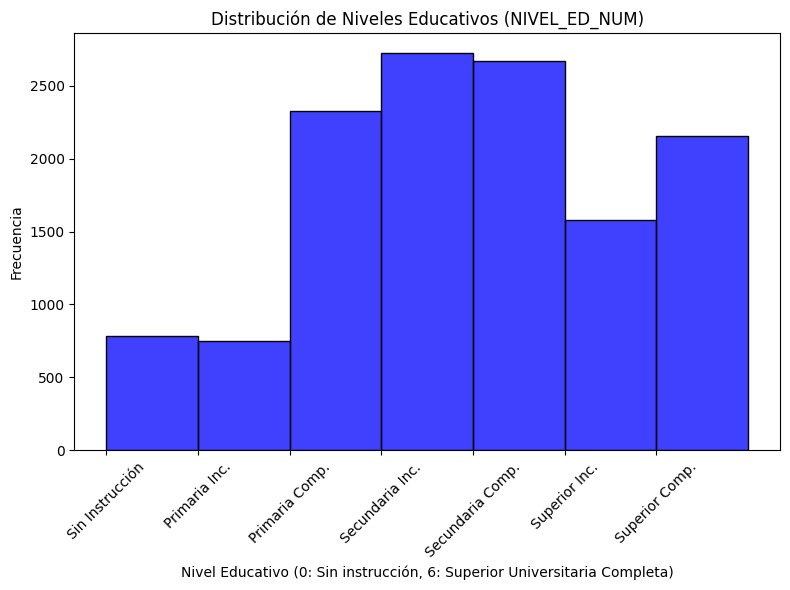

In [269]:
# --- Histograma de los niveles educativos ---
plt.figure(figsize=(8, 6))
sns.histplot(data=merge_data, x='NIVEL_ED_NUM', bins=7, kde=False, color='blue')
plt.title('Distribución de Niveles Educativos (NIVEL_ED_NUM)')
plt.xlabel('Nivel Educativo (0: Sin instrucción, 6: Superior Universitaria Completa)')
plt.ylabel('Frecuencia')
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=['Sin Instrucción', 'Primaria Inc.', 'Primaria Comp.', 
            'Secundaria Inc.', 'Secundaria Comp.', 'Superior Inc.', 'Superior Comp.'],
    rotation=45
)
plt.tight_layout()
plt.show()


# PARTE II

1) Para cada año, partan la base respondieron en una base de prueba y una
de entrenamiento (X_train, y_train, X_test, y_test) utilizando
el comando train_test_split. La base de entrenamiento debe
comprender el 70% de los datos, y la semilla a utilizar (random state
instance) debe ser 101. Establezca a desocupado como su variable
dependiente en la base de entrenamiento (vector y). El resto de las
variables serán las variables independientes (matriz X). Recuerden
agregar la columna de unos (1).


In [270]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np


In [280]:
data_2004['ESTADO'].value_counts()

respondieron2004=data_2004[data_2004['ESTADO']!='Entrevista individual no realizada (no respuesta al cuestion']
norespondieron2004=data_2004[data_2004['ESTADO']=='Entrevista individual no realizada (no respuesta al cuestion']
print(respondieron2004['ESTADO'].value_counts())

ESTADO
Ocupado                                                         3031
Inactivo                                                        2741
Menor de 10 años                                                1084
Desocupado                                                       512
Entrevista individual no realizada (no respuesta al cuestion       0
Name: count, dtype: int64


In [281]:
data_2024['ESTADO'].value_counts()

respondieron2024=data_2024[data_2024['ESTADO']!=0]
norespondieron2004=data_2024[data_2024['ESTADO']==0]
print(respondieron2024['ESTADO'].value_counts())

ESTADO
1    3201
3    2627
4     687
2     310
Name: count, dtype: int64


In [285]:
respondieron2024['desocupado'] = respondieron2024['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
print(respondieron2024['desocupado'].value_counts())

desocupado
0    6515
1     310
Name: count, dtype: int64


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\842966869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron2024['desocupado'] = respondieron2024['ESTADO'].apply(lambda x: 1 if x == 2 else 0)


In [284]:
respondieron2004['desocupado'] = respondieron2004['ESTADO'].apply(lambda x: 1 if x == 'Desocupado' else 0)
print(respondieron2004['desocupado'].value_counts())

desocupado
0    6856
1     512
Name: count, dtype: int64


C:\Users\fstrejilevich\AppData\Local\Temp\2\ipykernel_30320\2627509188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron2004['desocupado'] = respondieron2004['ESTADO'].apply(lambda x: 1 if x == 'Desocupado' else 0)


In [287]:
y2004=respondieron2004['desocupado']
y2024=respondieron2024['desocupado']
x2004=respondieron2004.drop(columns=['desocupado'])
x2024=respondieron2024.drop(columns=['desocupado'])

In [290]:
# Identificar las columnas que terminan en "y"
cols_a_eliminar = [col for col in x2004.columns if col.endswith('y')]
print("Columnas a eliminar:", cols_a_eliminar)
x2004 = x2004.drop(columns=cols_a_eliminar)


Columnas a eliminar: ['ANO4_y', 'TRIMESTRE_y', 'REGION_y', 'MAS_500_y', 'AGLOMERADO_y', 'PONDERA_y', 'ITF_y', 'DECIFR_y', 'IDECIFR_y', 'RDECIFR_y', 'GDECIFR_y', 'PDECIFR_y', 'ADECIFR_y', 'IPCF_y', 'DECCFR_y', 'IDECCFR_y', 'RDECCFR_y', 'GDECCFR_y', 'PDECCFR_y', 'ADECCFR_y']


In [291]:
# Identificar las columnas que terminan en "y"
cols_a_eliminar = [col for col in x2024.columns if col.endswith('y')]
print("Columnas a eliminar:", cols_a_eliminar)
x2024 = x2024.drop(columns=cols_a_eliminar)

Columnas a eliminar: ['ANO4_y', 'TRIMESTRE_y', 'REGION_y', 'MAS_500_y', 'AGLOMERADO_y', 'PONDERA_y', 'ITF_y', 'DECIFR_y', 'IDECIFR_y', 'RDECIFR_y', 'GDECIFR_y', 'PDECIFR_y', 'ADECIFR_y', 'IPCF_y', 'DECCFR_y', 'IDECCFR_y', 'RDECCFR_y', 'GDECCFR_y', 'PDECCFR_y', 'ADECCFR_y', 'PONDIH_y']


In [292]:
categorical_cols = x2004.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", categorical_cols)

Columnas categóricas: Index(['CODUSU', 'COMPONENTE', 'H15', 'TRIMESTRE_x', 'REGION_x', 'MAS_500_x',
       'AGLOMERADO_x', 'CH03', 'CH04', 'CH07',
       ...
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IDIMPH',
       'ESTADO_CIVIL_NUM'],
      dtype='object', length=184)


In [293]:
# Crear dummies solo para las columnas categóricas
x2004= pd.get_dummies(x2004, columns=categorical_cols, drop_first=True)

print("DataFrame con dummies:")
print(x2004)


DataFrame con dummies:
      NRO_HOGAR  ANO4_x  PONDERA_x  CH06  PP03D  PP3E_TOT  PP3F_TOT  PP04B2  \
0           1.0  2004.0     1299.0  79.0    0.0       0.0       0.0     0.0   
1           1.0  2004.0     2018.0  67.0    0.0       0.0       0.0     0.0   
2           1.0  2004.0     1486.0  74.0    0.0       0.0       0.0     0.0   
3           1.0  2004.0     1674.0  54.0    0.0      59.0       0.0     0.0   
4           1.0  2004.0     1674.0  51.0    0.0       0.0       0.0     0.0   
...         ...     ...        ...   ...    ...       ...       ...     ...   
7642        1.0  2004.0     1454.0   1.0    0.0       0.0       0.0     0.0   
7643        1.0  2004.0     1673.0  51.0    0.0      70.0       0.0     0.0   
7644        1.0  2004.0     1673.0  55.0    0.0      70.0       0.0     0.0   
7645        1.0  2004.0     1673.0  12.0    0.0       0.0       0.0     0.0   
7646        1.0  2004.0     1673.0  22.0    0.0      40.0       0.0     0.0   

      PP04B3_MES  PP04B3_ANO

In [ ]:
xtrain2024, xtest2024, ytrain2024, ytest2024 = train_test_split(x2024, y2024, test_size=0.3, random_state=101)
xtrain2004, xtest2004, ytrain2004, ytest2004 = train_test_split(x2004, y2004, test_size=0.3, random_state=101)